In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
p = Path("./deep-neural-network-master/Dataset/")

dirs = p.glob("*")
print(dirs)
print()

image_data = []
labels = []
lab2id = {"Pikachu":0, "Meowth":2, "Bulbasaur":1}
id2lab = {0:"Pikachu", 2:"Meowth", 1:"Bulbasaur"}

count = 0

for d in dirs:
#     print(d)
    folder = (str)(d).split("/")[-1]
    print(folder)
    
    imgs = d.glob("*.jpg")
    cnt = 0
    
    for i in imgs:
        cnt += 1
        
        img = image.load_img(i, target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(lab2id[folder])
        
    imgs = d.glob("*.png")
    
    for i in imgs:
        cnt += 1
        
        img = image.load_img(i, target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(lab2id[folder])
        
    print(cnt)

<generator object Path.glob at 0xb2b3f8258>

.DS_Store
0
Pikachu


/Users/riagupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


294
Bulbasaur
284
Meowth
70


In [3]:
print(len(image_data), len(labels))

648 648


In [4]:
X = np.array(image_data)
Y = np.array(labels)

In [5]:
import random
random.seed(10)

In [6]:
from sklearn.utils import shuffle

In [7]:
X, Y = shuffle(X, Y)
X = X/255.0          # Normalization

print(Y)

[1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 2 1 1 0 1 0 0 1 1 0 0 1 2 0 0 0 0 0 0 0 2
 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 2 1 0 0 1 0 0 0 0
 1 1 1 0 2 0 1 2 1 0 1 1 0 2 0 0 0 0 1 1 1 1 0 2 0 0 0 2 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 0 2 0 1 1 0 2 0 1 0 1 2 1 0 0 2 2 0 0 1 1 1 2 0 0 2 2
 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 2 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 2 1 1 1 2 1 1 0 0 0 0 2 0 1 1 1 0 1
 1 2 1 0 0 0 1 1 1 1 1 1 1 0 0 1 2 1 0 0 2 2 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1
 1 1 0 2 0 1 1 0 0 2 1 0 1 0 0 0 1 1 1 0 0 1 2 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 2 0 0 0 2 1 1 0 0 2 1 0 1 2 0 1 1 0 1 2 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 2 1 2 0 2 2 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 2 1 2
 0 1 1 1 0 1 0 2 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 2 0 1 1 1 0 1 2 1 1 0 0 1 0
 1 1 0 1 1 2 1 0 1 0 0 1 1 2 0 1 1 0 1 0 1 0 1 0 2 1 1 0 0 1 0 0 1 0 1 1 1
 0 0 2 1 0 0 0 1 0 1 0 2 0 1 1 0 1 0 2 0 0 0 0 2 0 0 1 0 0 0 0 0 1 0 1 1 1
 1 1 0 2 1 1 1 0 0 0 0 1 

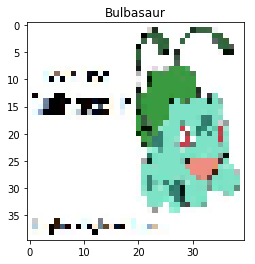

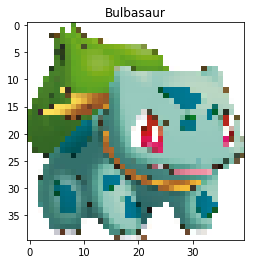

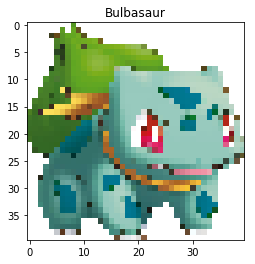

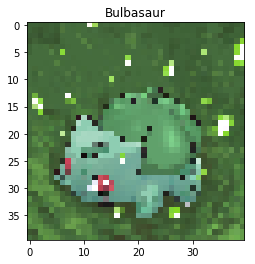

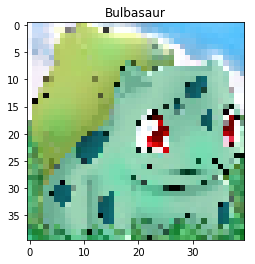

In [8]:
def drawImg(img, label):
    plt.title(id2lab[label])
    plt.imshow(img.reshape(40,40,3))
    plt.show()
    
for i in range(5):
    drawImg(X[i], Y[i])

In [9]:
print(X.shape)
print(Y.shape)

(648, 40, 40, 3)
(648,)


In [10]:
split = (int)(X.shape[0]*0.8)

X = np.array(X)
Y = np.array(Y)

X = X.reshape(X.shape[0], -1)

Xtr = X[:split, :]
Ytr = Y[:split]

Xts = X[split:, :]
Yts = Y[split:]

print(Xtr.shape, Ytr.shape)
print(Xts.shape, Yts.shape)

(518, 4800) (518,)
(130, 4800) (130,)


In [11]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        model = {}
        
        # Layer 1
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        # Layer 2
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        # Layer 3 (Output layer)
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
        self.activation_outputs = None
        
        
    def forward(self, X):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(X, W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        return y_
    
    
    def backward(self, X, Y, lr=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1, a2, y_ = self.activation_outputs
        m = X.shape[0]
        
        delta3 = y_ - Y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # Update the model parameters
        self.model['W1'] -= lr*dw1
        self.model['b1'] -= lr*db1
        
        self.model['W2'] -= lr*dw2
        self.model['b2'] -= lr*db2
        
        self.model['W3'] -= lr*dw3
        self.model['b3'] -= lr*db3
        
        
    def predict(self, X):
        y_probs = self.forward(X)
        return np.argmax(y_probs, axis=1)
    
    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1, a2, y_ = self.activation_outputs
        
        print("W1", W1.shape)
        print("b1", b1.shape)
        print("A1", a1.shape)
        print()
        
        print("W2", W2.shape)
        print("b2", b2.shape)
        print("A2", a2.shape)
        print()
        
        print("W3", W3.shape)
        print("b3", b3.shape)
        print("Y_", y_.shape)
        print()
        
def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1

    return y_oht
    
        
def loss(y_oht, y_probs):
    l = -np.mean(y_oht*np.log(y_probs))
    return l

def softmax(a):
    e_a = np.exp(a) # Vector 
    ans = e_a/np.sum(e_a, axis=1, keepdims=True)
    return ans

def train(X, Y, model, epochs, lr=0.001, logs=True):
    losses = []
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        losses.append(l)
        model.backward(X, Y_OHT, lr)
        
        if (logs) and (ix%50 == 0 or ix == epochs-1):
            print("Epoch %d, Loss %.4f"%(ix, l))
            
    return losses

In [12]:
input_size = 40*40*3

model = NeuralNetwork(input_size, [100, 50], 3)

In [13]:
l = train(Xtr, Ytr, model, 1000, 0.0008)

Epoch 0, Loss 3.4912
Epoch 50, Loss 0.5361
Epoch 100, Loss 0.3335
Epoch 150, Loss 0.0577
Epoch 200, Loss 0.0355
Epoch 250, Loss 0.0287
Epoch 300, Loss 0.0241
Epoch 350, Loss 0.0211
Epoch 400, Loss 0.3544
Epoch 450, Loss 0.0502
Epoch 500, Loss 0.0258
Epoch 550, Loss 0.0191
Epoch 600, Loss 0.0160
Epoch 650, Loss 0.0140
Epoch 700, Loss 0.0122
Epoch 750, Loss 0.0109
Epoch 800, Loss 0.0100
Epoch 850, Loss 0.0092
Epoch 900, Loss 0.0085
Epoch 950, Loss 0.0074
Epoch 999, Loss 0.0067


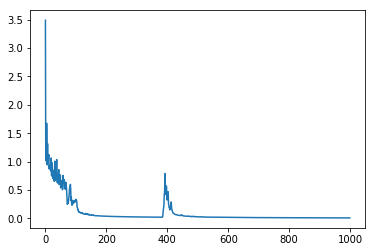

In [14]:
# plt.style.use("seaborn")
plt.plot(l)
plt.show()

In [15]:
def getAccuracy(X, Y):
    Y_ = model.predict(X)
    return np.sum(Y == Y_)/Y.shape[0]

In [16]:
print(getAccuracy(Xtr, Ytr)*100, "%")
print(getAccuracy(Xts, Yts)*100, "% ")

99.61389961389962 %
84.61538461538461 % 


_This means that our model is overfitting, as training accuracy is high, but test set accuracy is very low_
#### Solutions:
- Dropouts
- Early stopping
- Validation set (stop when minimum loss)


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from visualize import plot_confusion_matrix

In [18]:
Ytr_pred = model.predict(Xtr)

cnf = confusion_matrix(Ytr, Ytr_pred)
print(cnf)

[[229   1   0]
 [  1 235   0]
 [  0   0  52]]


Confusion matrix, without normalization
[[229   1   0]
 [  1 235   0]
 [  0   0  52]]


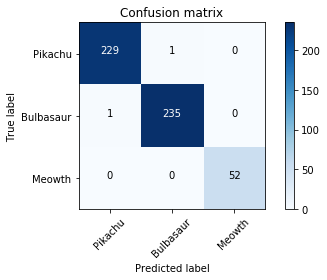

In [19]:
plot_confusion_matrix(cnf, classes=['Pikachu', 'Bulbasaur', 'Meowth'])

Confusion matrix, without normalization
[[58  2  4]
 [ 1 44  3]
 [ 4  6  8]]


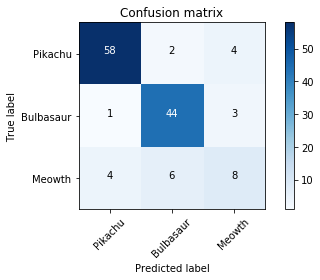

In [20]:
Yts_pred = model.predict(Xts)

cnf2 = confusion_matrix(Yts, Yts_pred)

plot_confusion_matrix(cnf2, classes=['Pikachu', 'Bulbasaur', 'Meowth'])

In [21]:
print(classification_report(Ytr, Ytr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00        52

   micro avg       1.00      1.00      1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518



In [22]:
print(classification_report(Yts, Yts_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.85      0.92      0.88        48
           2       0.53      0.44      0.48        18

   micro avg       0.85      0.85      0.85       130
   macro avg       0.77      0.76      0.76       130
weighted avg       0.84      0.85      0.84       130



#### Visualizing Misclassifications

Pikachu


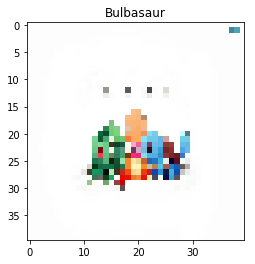

Bulbasaur


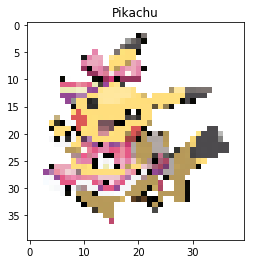

Number of misclassifications in training set: 2


In [23]:
c = 0

for i in range(Ytr.shape[0]):
    p = model.predict(Xtr[i])
    if Ytr[i] != p:
        print(id2lab[p[0]])
        drawImg(Xtr[i], Ytr[i])
        c += 1
    
print("Number of misclassifications in training set:", c)

Pikachu


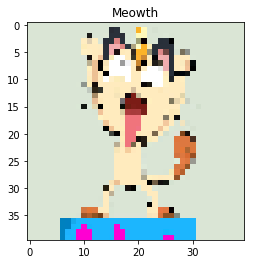

Meowth


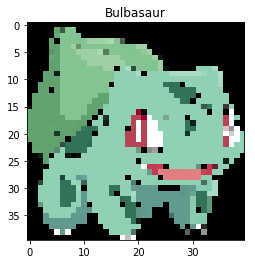

Bulbasaur


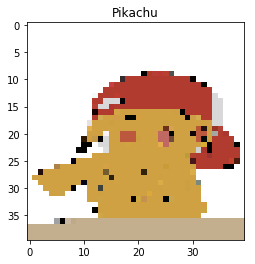

Pikachu


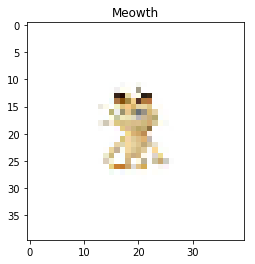

Bulbasaur


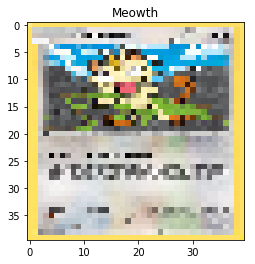

Bulbasaur


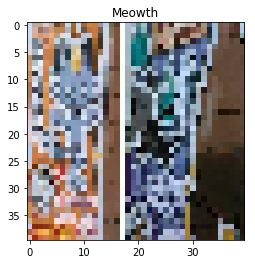

Meowth


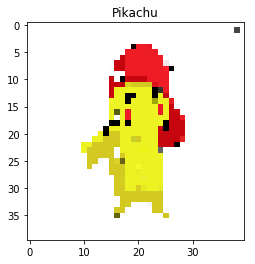

Bulbasaur


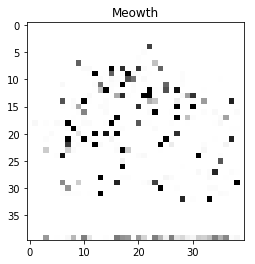

Meowth


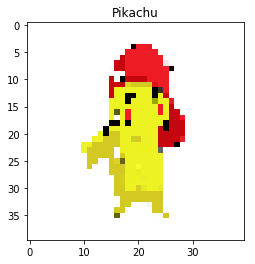

Meowth


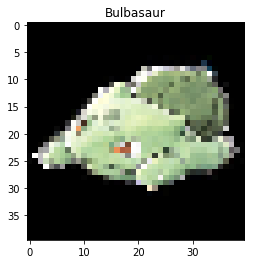

Pikachu


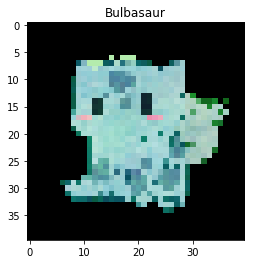

Bulbasaur


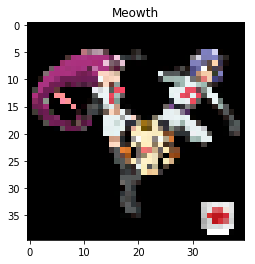

Pikachu


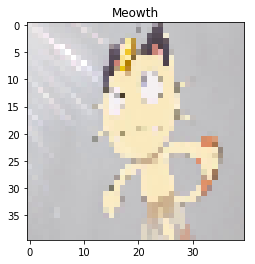

Bulbasaur


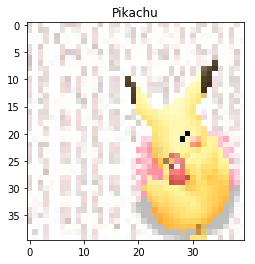

Bulbasaur


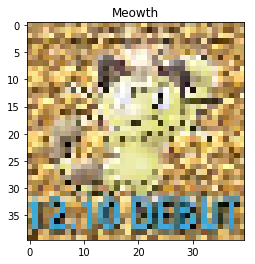

Meowth


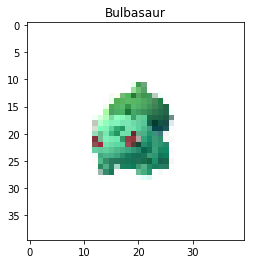

Pikachu


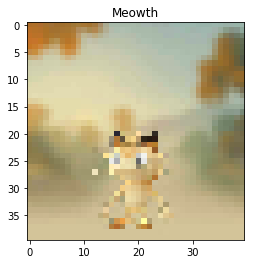

Meowth


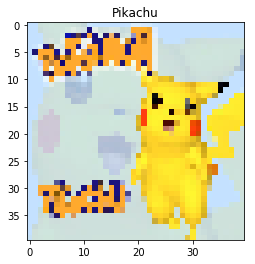

Meowth


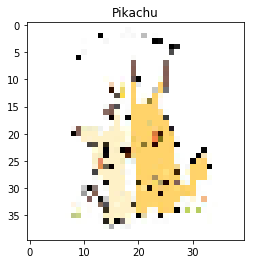

Bulbasaur


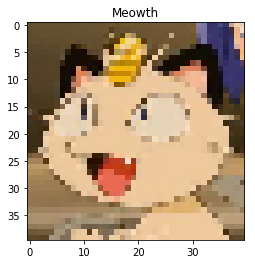

Number of misclassifications in test set: 20


In [25]:
c = 0

for i in range(Yts.shape[0]):
    p = model.predict(Xts[i])
    if Yts[i] != p:
        print(id2lab[p[0]])
        drawImg(Xts[i], Yts[i])
        c += 1
    
print("Number of misclassifications in test set:", c)